# POD Summary

In [1]:
# import relevant module
import openturns as ot
import otpod
# enable display figure in notebook
%matplotlib inline

## Generate data

In [2]:
inputSample = ot.NumericalSample(
    [[4.59626812e+00, 7.46143339e-02, 1.02231538e+00, 8.60042277e+01],
    [4.14315790e+00, 4.20801346e-02, 1.05874908e+00, 2.65757364e+01],
    [4.76735111e+00, 3.72414824e-02, 1.05730385e+00, 5.76058433e+01],
    [4.82811977e+00, 2.49997658e-02, 1.06954641e+00, 2.54461380e+01],
    [4.48961094e+00, 3.74562922e-02, 1.04943946e+00, 6.19483646e+00],
    [5.05605334e+00, 4.87599783e-02, 1.06520409e+00, 3.39024904e+00],
    [5.69679328e+00, 7.74915877e-02, 1.04099514e+00, 6.50990466e+01],
    [5.10193991e+00, 4.35520544e-02, 1.02502536e+00, 5.51492592e+01],
    [4.04791970e+00, 2.38565932e-02, 1.01906882e+00, 2.07875350e+01],
    [4.66238956e+00, 5.49901237e-02, 1.02427200e+00, 1.45661275e+01],
    [4.86634219e+00, 6.04693570e-02, 1.08199374e+00, 1.05104730e+00],
    [4.13519347e+00, 4.45225831e-02, 1.01900124e+00, 5.10117047e+01],
    [4.92541940e+00, 7.87692335e-02, 9.91868726e-01, 8.32302238e+01],
    [4.70722074e+00, 6.51799251e-02, 1.10608515e+00, 3.30181002e+01],
    [4.29040932e+00, 1.75426222e-02, 9.75678838e-01, 2.28186756e+01],
    [4.89291400e+00, 2.34997929e-02, 1.07669835e+00, 5.38926138e+01],
    [4.44653744e+00, 7.63175936e-02, 1.06979154e+00, 5.19109415e+01],
    [3.99977452e+00, 5.80430585e-02, 1.01850716e+00, 7.61988190e+01],
    [3.95491570e+00, 1.09302814e-02, 1.03687664e+00, 6.09981789e+01],
    [5.16424368e+00, 2.69026464e-02, 1.06673711e+00, 2.88708887e+01],
    [5.30491620e+00, 4.53802273e-02, 1.06254792e+00, 3.03856837e+01],
    [4.92809155e+00, 1.20616369e-02, 1.00700410e+00, 7.02512744e+00],
    [4.68373805e+00, 6.26028935e-02, 1.05152117e+00, 4.81271603e+01],
    [5.32381954e+00, 4.33013582e-02, 9.90522007e-01, 6.56015973e+01],
    [4.35455857e+00, 1.23814619e-02, 1.01810539e+00, 1.10769534e+01]])

signals = ot.NumericalSample(
    [[ 37.305445], [ 35.466919], [ 43.187991], [ 45.305165], [ 40.121222], [ 44.609524],
     [ 45.14552 ], [ 44.80595 ], [ 35.414039], [ 39.851778], [ 42.046049], [ 34.73469 ],
     [ 39.339349], [ 40.384559], [ 38.718623], [ 46.189709], [ 36.155737], [ 31.768369],
     [ 35.384313], [ 47.914584], [ 46.758537], [ 46.564428], [ 39.698493], [ 45.636588],
     [ 40.643948]])

## Compute POD with several methods
The object POD summary enables the user to compute the POD with all available techniques. techniques can be activated or not thanks to the method *setMethodActive*. Then results can be printed or saved in a file to be compared. Moreover all graphs from the studies can be saved in a given directory.

The techniques are all activated by default :
- Univariate linear model with Gaussian residuals,
- Univariate linear model with no hypothesis on the residuals (Binomial),
- Univariate linear model with kernel smoothing on the residuals,
- Quantile regression,
- Polynomial chaos,
- Kriging (if input dimension > 1)

In [3]:
# signal detection threshold
detection = 38.
# The POD summary take
POD = otpod.PODSummary(inputSample, signals, detection)
# The main parameters can modified :
# The number of simulation to compute the confidence level
POD.setSimulationSize(500)
# The number of Monte Carlo simulation to compute the POD for polynomial chaos and kriging
POD.setSamplingSize(2000)
# Deactivate the quantile regression technique
POD.setMethodActive('QuantileRegression', False)
# Finally run
POD.run()


Start univariate linear model analysis...

Start univariate linear model POD with Gaussian residuals...

Start univariate linear model POD with no hypothesis on the residuals...

Start univariate linear model POD with kernel smoothing on the residuals...
Computing POD (bootstrap): [==================================================] 100.00% Done

Start polynomial chaos POD...
Start build polynomial chaos model...
Polynomial chaos model completed
R2 : 0.9999
Q2 : 0.9987
Computing POD per defect: [==================================================] 100.00% Done

Start kriging POD...
Start optimizing covariance model parameters...
Kriging optimizer completed
Q2 : 0.9999
Computing POD per defect: [==================================================] 100.00% Done


### Access to the dictionnary of the active methods

In [4]:
POD.getMethodActive()

{'Kriging': True,
 'LinearBinomial': True,
 'LinearGauss': True,
 'LinearKernelSmoothing': True,
 'PolynomialChaos': True,
 'QuantileRegression': False}

## Show results

It is shown the linear analysis results as well as the validation results of each model with the detection size computed for a given probability level and confidence level. These both values can be changed as parameters of the *printResults* method. The default values are probability level = 0.9 and confidence level = 0.95.

A warning is printed when the detection size with a technique returns an error. In this case, the return value is -1.

In [10]:
POD.printResults()

--------------------------------------------------------------------------------
         Linear model analysis results
--------------------------------------------------------------------------------
Box Cox parameter :                               Not enabled              
                                                                           
                                                   Uncensored              
                                                                           
Intercept coefficient :                                  0.02              
Slope coefficient :                                      8.71              
Standard error of the estimate :                         2.29              
                                                                           
Confidence interval on coefficients                                        
Intercept coefficient :                         [-10.03, 10.07]              
Slope coefficient :                  

Results can be displayed for another probability and confidence level.

In [6]:
POD.printResults(0.8, 0.9)

--------------------------------------------------------------------------------
         Linear model analysis results
--------------------------------------------------------------------------------
Box Cox parameter :                               Not enabled              
                                                                           
                                                   Uncensored              
                                                                           
Intercept coefficient :                                  0.02              
Slope coefficient :                                      8.71              
Standard error of the estimate :                         2.29              
                                                                           
Confidence interval on coefficients                                        
Intercept coefficient :                         [-10.03, 10.07]              
Slope coefficient :                  

## Save results

The results can be saved in a text or csv file. As for the print method, the probability level and confidence level can be specified as parameters.

In [7]:
POD.saveResults('results.csv', probabilityLevel=0.9, confidenceLevel=0.95)

## Draw and save graphs
All available graphs can be saved using the method *saveGraphs*. A specific directory and the extension of the files can be given as parameters. As before the probability level and confidence level can also be chosen by the user.

The warning is also printed here for the polynomial chaos because the detection size at the given probability level cannot be computed. A solution is to set *probabilityLevel = None*.

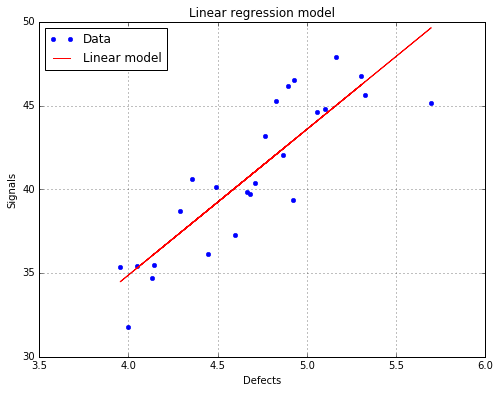

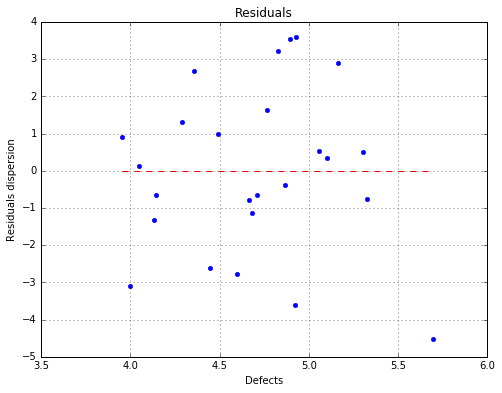

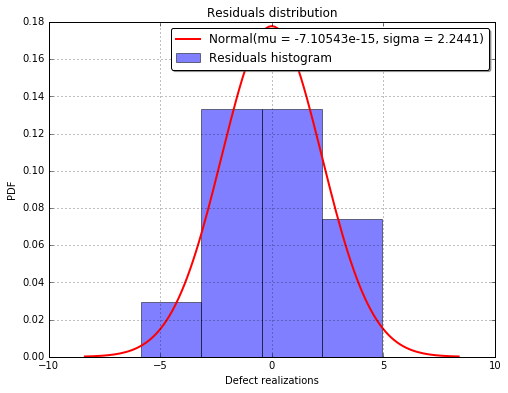

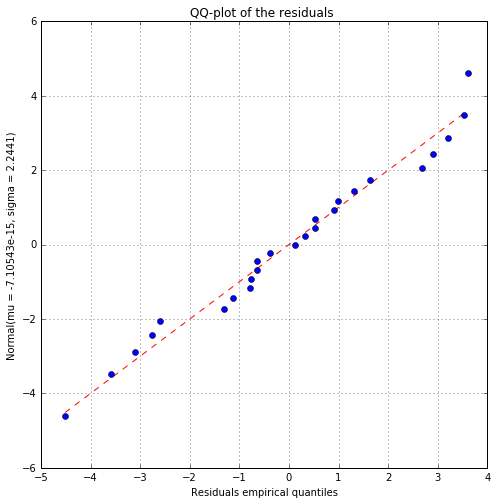

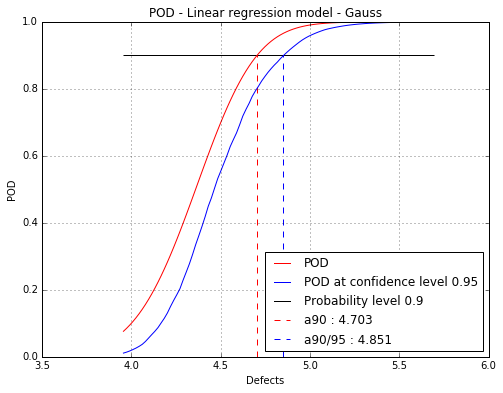

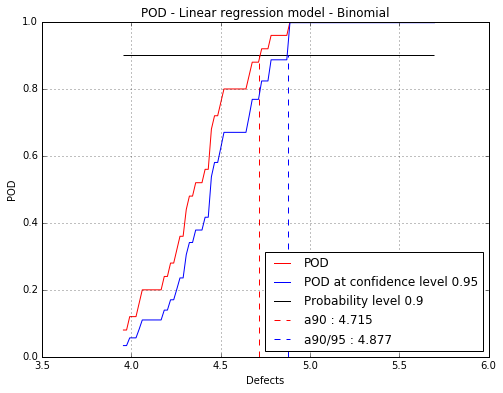

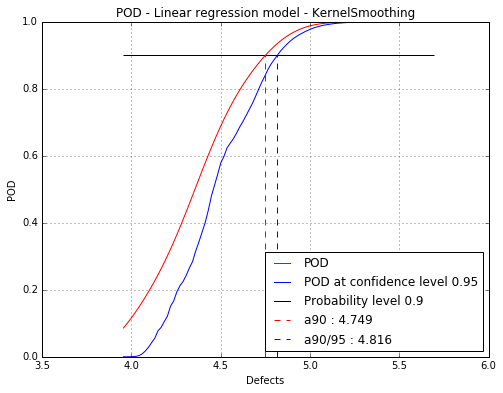

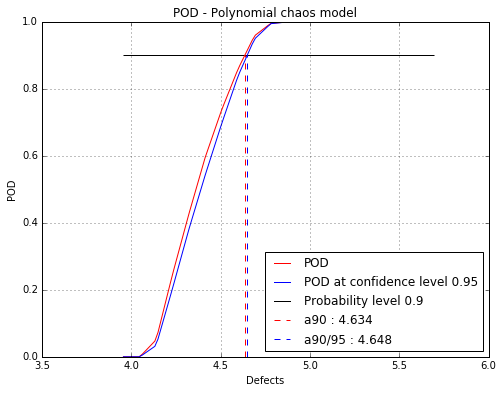

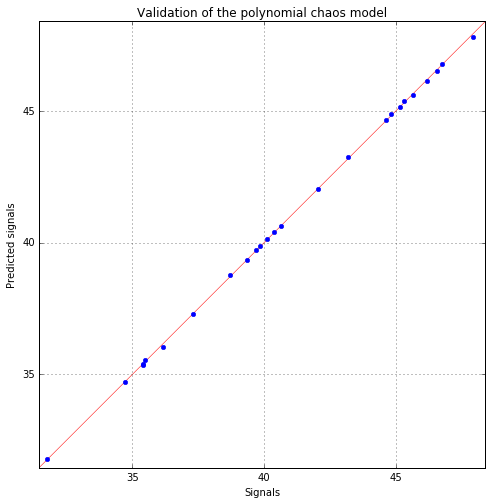

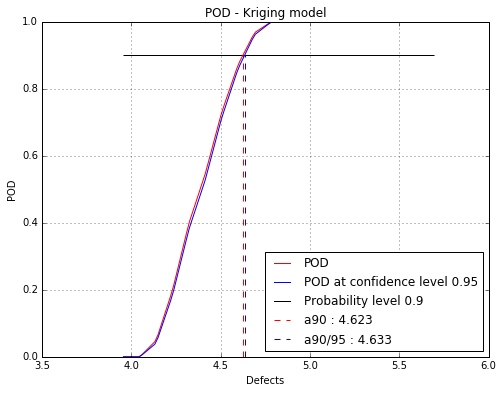

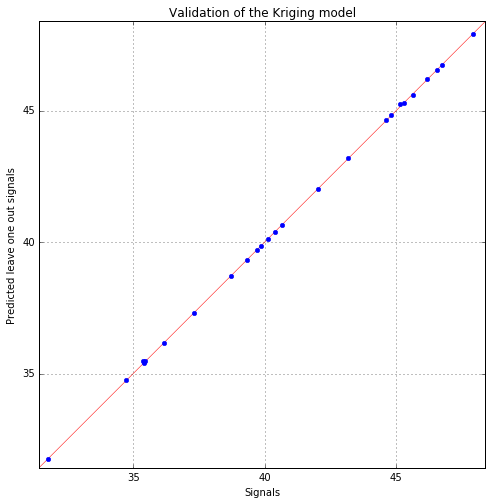

In [9]:
# return a list a figure
fig = POD.drawGraphs('./figure/', 'png', probabilityLevel=0.9, confidenceLevel=0.95)

for i in xrange(len(fig)):
    fig[i].show()